# Unsupervised Learning Techniques

Although most of the applications of Machine Learning today are based on supervised learning (and as a result, this is where most of the investments go to), the vast majority of the available data is actually unlabeled: we have the input features X, but we do not have the labels y. Yann LeCun famously said that "if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake". In other words, there is a huge potential in unsupervised learning that we have only barely started to sink our teeth into.

For example, say you want to create a system that will take a few pictures of each item on a manusfactoring production line and detect which items are defective. You can fairly easily create a system that will take pictures automatically, and this might give you thousands of pictures every day. You can then build a reasonably large dataset in just a few weeks, But wait, there are no labels! If you want to train a regular binary classifier that will predict whether an item is defective or not, you will need to label every single picture as "defective" or "normal". This will generally require human experts to sit down and manually go through all the pictures. This is a long, costly and tedious talk, so it will usually only be done on a small subset of the available pictures. As a result, the labeled dataset will be quite small, and the classifier's performance will be disappointing. Moreover, every time the company makes any change to its products, the whole process will need to be started over from scratch. Wouldn't it be great if the algorithm could just exploit the unlabeled data without needing humans to label every picture? Enter unsupervised learning.

In Chapter 8, we looked at the most common unsupervised learning task: dimensionality reduction. In this chapter, we will look at a few more unsupervised learning tasks and algorithms:

- *Clustering*: the goal is to group similar instances together into *cluster*. This is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

- *Anomaly detection*: the objective is to learn what "normal" data looks like, and use this to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

- *Density estimation*: this is the task of estimating the *probability density function* (PDF) of the random process that generated the dataset. This is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

## Clustering

As you enjoy a hike in the mountains, you stumble upon a plant you have never seen before. You look around and you notice a few more. They are not perfectly identical, yet they are suffiently similar for you to know that they most likely belong to the same species (or at least the same genus). You may need a botanist to tell you what species that is, but you certainly don't need an expert to identify groups of similar-looking objects. This is called *clustering*: it is the task of identifying similar instances and assigning them to *clusters*, i.e., groups of similar instances.

Just like in classification, each instance gets assigned to a group. However, this is an unsupervised task. 

Clustering is used in a wide variety of applications, including:

- For customer segmentation: you can cluster your customers based on their purchases, their activity on you website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in *recommender systems* to suggest content that other users in the same cluster enjoyed.

- For data analysis: when analyzing a new dataset, it is often useful to first discover cluster of similar instances, as it is often eaasier to analyze clusters separately.

- As a dimensionality reduction technique: once a dataset has been clustered, it is usually possible to measure each instance's *affinity* with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance's feature vector $x$ can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k dimensional. This is typically much lower dimensional than the original feature vector, but it can preserve enough information for further processing.

- For *anomaly detection* (also called *outlier detection*): any instance that has a low affinity to all the clusters is likely to be an anomlay. For example, if you have clustered the users of your website on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for *fraud detenction*.

- For semi-supervised learning: if you only have a few labels, you could perform clustering and propagate the lables to all the instances in the same cluster. This can greatly increase the amount of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

- For seach engines: for example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clusterig algorithm to all the images in you database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image's cluster using the trained clustering model and you can the nsimply return all the images from this cluster.

- To segment an image: by clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters. For example, some algorithms look for instances centered around a particular point, called a *centroid*. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters. ANd the list goes on.

In this seciton, we will look at two popular clustering algorithms: K-Means and DBSCAN, and we will show some of their applications, such as non-linear dimensionality reduction, semi-supervised learning and anomaly detection.

### K-Means

Considered the unlabeled dataset plotted below: you can clearly see 5 blobs of instances. The K-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

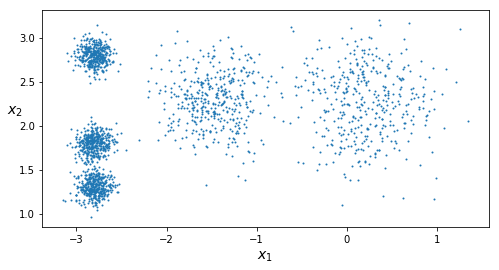

In [2]:
from sklearn.datasets import make_blobs
np.random.seed(1)
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Let's train a K-means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [3]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)
print(y_pred)

[0 4 2 ... 3 2 4]


Note that you have to specify the number of clusters k that the algorithm must find. In this example, it is pretty obvious from looking at the data that k should be set to 5, but in general it is not that easy.

Each instance was assigned to one of the 5 clusters. In the context of clustering, an instance's label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task). THe KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable.
We can also take a look at the 5 centroids that the algorithm found:

In [4]:
print(kmeans.labels_)
kmeans.cluster_centers_

[0 4 2 ... 3 2 4]


array([[-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

Of course, you can easily assign new instances to the cluster whose centroid is closest:

In [5]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3])

If you plot the cluster's decision boundaries, you get a Voronoi tessellation (see figure below, where each centroid is represented with an X).

![alt text](voronoi.PNG "voronoi plot")

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top left cluster and the central cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters since all it cares about when assigning an instance to a cluster is the distance from the centroid.

Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to just give each instance a score per cluster: this is called *soft clustering*. For example, the score can be the distance between the instance and the centroid, or conversely it can be a similarity score (or affinity) such as the Gaussian Radial Basis Function. In the KMeans class, the transform() method measures the distance from each instance to every centroid:

In [6]:
kmeans.transform(X_new)

array([[2.88633901, 1.49439034, 0.32995317, 2.9042344 , 2.81093633],
       [5.84236351, 4.4759332 , 2.80290755, 5.84739223, 5.80730058],
       [1.71086031, 1.69136631, 3.29399768, 0.29040966, 1.21475352],
       [1.21567622, 1.54808703, 3.21806371, 0.36159148, 0.72581411]])

In this example, the first instance in X_new is located at a distance of 2.88 from the first centroid, 1.49 from the second centroid, 0.32 from the third centroid, 2.90 from the fourth centroid, 2.81 from the fifth centroid. If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this can be a very efficient non-linear dimensionality reduction technique.

#### The K-Means Algorithm

So how does the algorithm work? Well it is really quite simple. Suppose you were given the centroids: you could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the means of the instances for each cluster.

But you are given neither the labels nor the centroids, so how can you proceed? Well, just start by placing the centroids randomly (e.g. by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The algorithm is guarateed to converge in a finite number of steps (usually quite small), it will not oscillate forever. You can see the algorithm in action in the figure below:

![alt text](kalgo.PNG "kmeans algo")

**Note**:

The computational complexity of the algorithm is generally linear with regards to the number of instances m, the number of clusters k and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worst case scenario the complexity can increaase exponentially with the number of instacnes. In practice, however this rarely happens, and the K-Means is generally one of the fastest clustering algorithms.

Unfortunately, although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e. it may converge to a local optimum): this depends on the centroid initialization. 

Let's look at a few ways you can mitigate this risk by improving the centroid initialization.

##### Centroid Initialization Methods

If you happen to know approximately where the centroids should be (e.g. if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:

In [7]:
good_init = np.array([[-3,3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. This is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that the whole algorithm described earlier actually runs 10 times when you call fit(), and Scikit-Learn keeps the best solution. But how exactly does it know which solution is the best? Well of course it uses a performance metric! It is called the model's *inertia*: this is the mean squared distance between each instance and its closest centroid. If you are curious, a model's inertia is accessible via the inertia_ instance variable:

In [8]:
kmeans.fit(X)
print(kmeans.inertia_)

211.5985372581684


The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method mst alwaus respect the *great is better* rule.

In [9]:
print(kmeans.score(X))

-211.59853725816856


An important improvement to the K-Means algorithm, called *K-Means*++, introduced a smarter initialization step that tends to select centroids that are distant from one another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution. It was shown that the additional computation required for the smarter initialization step is well worth it since it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. Here is the K-Means++ initialization algorithm:

- Take one centroid $c^{(i)}$, chosen uniformly at random from the dataset.

- Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability: $D(x^{(i)})^2 \sum_{j = 1}^m D(x^{(j)})^2$ where $D(x^{(i)})^2$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances further away from already chosen centroids are much more likely to be selected as centroids.

- Repeat the previous step untill all k centroids have been chosen

The KMeans class actually uses this initialization method by default. If you want to force it to use the original method (i.e. picking k instances randomly to define the initial centroids), then you can set the init hyperparameter to "random". You will rarely need to do this.

##### Accelerated K-Means and Mini-batch K-Means

Another important improvement to the K-Means algorithm, it considerably accelerates the algorithm by avoiding many unnecessary distance calculations. This is achieved by exploiting the triangle inequality (i.e. the straight line is always the shortest; the triangle inequality is AC $\leq$ AB + BC where A, B and C are three points, and AB, AC and BC are the distances between these points) and by keeping track of lower and upper bounds for distances between instances and centroids. This is the algorithm used by default by the KMeans class (but you can force it to use the original algorithm by setting the algorithm hyperpameter to "full", although you probably will never need to).


Another important variant of the K-Means algorithm is mini-batch K-Means. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:

In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA in chapter 8. Alternatively, you can pass one mini-batch at a time to the partial_fit() method, but this will require much more work, since you will need to perform multiple initializations and select the best one yourself.

Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. 

##### Finding the Optimal Number of Clusters

So far, we have set the number of clusters k to 5 because it was obvious by looking at the data that this is the correct number of clusters. But in general, it will not be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. 

You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple. The inertia is not a good performance metric when trying to choose k since it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.

If we plot the inertia against the number of clusters, we will see that it decreaes quickly as we increase k up to a point. Then it decreases much more slowly as we keep increasing k. The curve has the shape of an arm, with an "elbow" at some k. If we did not know better, it would be a good choice to choose k equal to value corresponding to the "elbow": any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.

This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but also more computationally expensive) is to use the *silhouette score*, which is the mean *silhouette coefficient* over all the instances. An instance's silhoette coefficient is equal to $(b - a)/ max(a,b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster. To compute the silhouette score, you can use Scikit-Learn's silhouette_score() function, giving it all the instances in the dataset, and the labels they were assigned:

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

We could compare the silhouette scores for different numbers of clusters with a plot. This visualization will be much informative than plotting inertia vs number of clusters as it will provide a "goodness" of clustering for each k (instead of just visualizing the decline in inertia).

An even more informative visualziation tool is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a *silhoette diagram* (figure below).

![alt text](silhouette.PNG "silhouette diagram")

The vertical dashed lines represent the silhouette score for each number of clusters k. When most of the instances in a cluster have a lower coefficient than this score (i.e. if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We can see that when k = 3 and when k = 6, we get bad clusters, But when k = 4 or k = 5, the clusters look pretty good - most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top), is rather big, while when k = 5, all clusters have similar sizes, so even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

### Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid sub-optimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes. So, depending on the data, different clustering algorithms may perform better. For example, on these types of elliptical clusters, Gaussian mixture models work great.

**Note**:

It is important to scale the input features before you run K-Means, or else the clusters may be very stretched, and K-means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

Now let's look at a few ways we can benefit from clustering. We will use K-Means, but feel free to experiment with other clustering algorithms.

### Using clustering for image segmentation

*Image segmentation* is the task of partitioning an image into multiple segments. In *semantic segmentation*, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car's vision system, all pixels that are part of a pedestrian's image might be assigned to the "pedestrian" segment (there would just be one segment containing all the pedestrians). In *instance segmentation*, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian. The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks. Here, we are going to do something much simpler: *color segmentation*. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient, for example if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

First, let's load the image using Matplotlib's imread() function:

In [12]:
from matplotlib.image import imread
image = imread("ladybug.png")
image.shape

(533, 800, 3)

The image is represented as a 3D array: the first dimension's size is the height, the second is the width, and the third is the number of color channels, in this case red, green and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green and blue, each between 0.0 and 1.0 (or between 0 and 255 if you use imageio.imread()). Some images may have less channels such as grayscale images (one channel), or more channels, such as images with an additional *alpha channel* for transparency, or satellite images which often contain channels for many light frequencies (e.g. infrared). The following reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means. For example, it may identify a color cluster for all shades of green. Next, for each color, it looks for the mean color of the pixel's color cluster. For example, all shades of green may be replaced with the same light green color (assuming it is the mean color of the green cluster). Finally it reshapes this long list of colors to get the same shape as the original image.

In [13]:
X = image.reshape(-1, 3)
print(X.shape)
kmeans = KMeans(n_clusters = 8).fit(X)

(426400, 3)


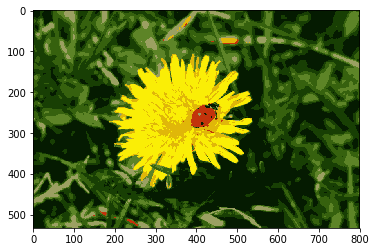

In [14]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

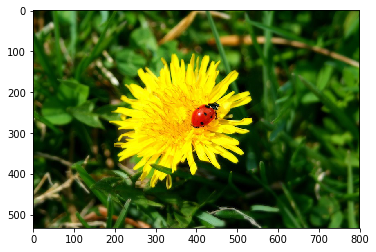

In [15]:
plt.imshow(image)

### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. For example, let's takle the *digits dataset* which is a simple MNIST-like dataset containing 1,797 grayscale 8x8 images representing digits 0 to 9. First let's load the datset:

In [16]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

Now let's split it into a training set and a test set:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 1)

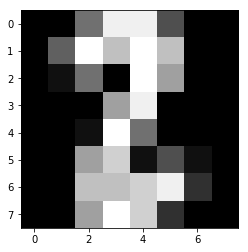

In [18]:
plt.imshow(X_train[0].reshape(8,8), cmap='gray')

Next, let's fit a Logistic Regression model:

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's evaluate its accuracy on the test set:

In [20]:
log_reg.score(X_test, y_test)

0.9644444444444444

Okay, that's our baseline: 97.1 % accuracy. Let's see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their ditances to these 50 clusters, then apply a logistic regression model.

**Caution**:

Although it is tempting to define the number of clusters to 10, since there are 10 different digits, it is unlikely to perform well, because there are several different ways to write each digit.

In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50, random_state = 1)),
    ("log_reg", LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Now let's evaluate this classification pipeline:

In [22]:
pipeline.score(X_test, y_test)

0.9777777777777777

How about that? it improved by 1.3%

But we chose the number of clusters k completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier: there's no need to perform silhoette analysis or minimize the inertia, the best value of k is simply the one that results in the best classification performance during cross-validation. Let's use GridSearchCV to find the optimal number of clusters:

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] 

[CV] ............................ kmeans__n_clusters=22, total=   0.3s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.3s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.3s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   0.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   0.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.5s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.5s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.5s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.6s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   1.0s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   1.1s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  2.7min finished
C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, d...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kmeans__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

Let's look at the best value for k, and the performance of the resulting pipeline:

In [24]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 75}
0.9755555555555555


### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. Let's train a logistic regression model on a sample of 50 labeled instances from the digits dataset:

In [25]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

What is the performance of this model on the test set?

In [26]:
log_reg.score(X_test, y_test)

0.8422222222222222

The accuracy is just 80%: it should come as no surprise that this is much lower than earlier, when we trained the model on the full training set. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [27]:
k = 50
kmeans = KMeans(n_clusters = k, random_state = 1)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

Now let's look at each image and manually label it:

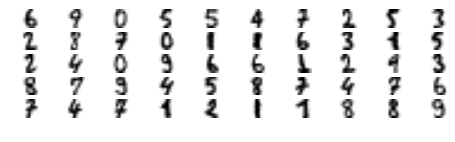

In [28]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [29]:
## warning, it has to be changed at every run.
y_representative_digits = np.array([
     6, 9, 0, 5, 5, 4, 7, 2, 5, 3,
    2, 8, 7, 0, 1, 8, 6, 3, 1, 5,
    2, 4, 0, 9, 6, 6, 1, 2, 9, 3,
    8, 7, 9, 4, 5, 8, 7, 4, 7, 6,
    7, 4, 7, 1, 2, 1, 1, 8, 8, 9])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8977777777777778

Wow, we jumped from 80% acc. to ~90% acc. although we are still only training the model on 50 instances. Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster? This is called *label propagation*:

In [31]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

Now let's train the model again and look at its performance:

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8911111111111111

We got a tiny accuracy decrease. The problem is that we propagated each representative instance's label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let's see what happens if we only propagate the labels to the 20% of the instances that are closer to the centroids:

In [33]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i) # boolean index array for label = i
    cluster_dist = X_cluster_dist[in_cluster] # slicing of dist 
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance) 
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Now le'ts train the model again on this partially propagated dataset:

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8888888888888888

In [35]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9657534246575342

#### Active Learning

To continue improving your model and your training set, the next step could be to do a few rounds of *active learning*: this is when a human expet interacts with the learning algorithm, providing labels when the algorithm needs them. There are many different strategies for active learning, but one of the most common ones is called *uncertainty sampling*:

- The mode is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.

- The instances for which the model is most uncertain (i.e. when its estimated probability is lowest) must be labeled by the expert.

- Then you just iterate this process again and again, until the performance improvement stops being worth the labeling effort.


Other strategies include labeling the instances that would result in the largest model change, or the largest drop in the model's validation error, or the instances that different models disagree on (e.g. an SVM, a Random Forest, and so on).

### DBSCAN

This algorithm defines clusters as continuous regions of high density. It is actually quite simple:

- For each instance, the algorithm counts how many instances are located within a small distance $\varepsilon$ (epsilon) from it. This region is called the instance's in *$\varepsilon$-neighborhood*

- If an instances has at least `min_samples` instances in its $\varepsilon$-neighborhood (including itself), then it is considered a *core instance*. In other words, core instances are those that are located in dense regions.

- All instances in the neighborhood of a core instance belogn to the same cluster. This may include other core instances, therefore a long sequence of neighboring core instances forms a single cluster.

- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regiongs. The DBSCAN class in Sckit-Learn is as simple to use as you might expect. Let's test it on the moons dataset.

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05, random_state = 1)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

The labels of all the instances are now available in the `labels_` instance variable:

In [37]:
dbscan.labels_

array([-1,  0,  5,  1,  3,  2,  3,  0, -1,  4,  5,  4,  2,  1,  2,  4,  4,
        4,  6, -1, -1,  5,  7, -1,  5,  4,  4, -1,  8,  9, -1, 10, 10, -1,
        5,  3,  4, 10,  6,  6,  0, 10,  4,  4,  4,  8, 11,  4,  5,  2, 10,
        4, -1,  4,  4,  5,  0, 10,  5, 10,  1,  3,  9, 10,  0,  0,  5, -1,
       11,  4, 10,  9,  3,  2,  5,  4,  4,  0,  1,  6,  3, -1, 10, -1,  2,
        2, -1,  0,  8, 11,  6,  4, -1,  2,  5, 10, 11,  8,  3,  4,  1, -1,
        0,  4,  5,  0,  3, 11,  4,  2, -1, 10,  2,  4,  0,  4, 10,  5,  4,
       10,  4,  1, -1,  4,  5, 10,  0, 10,  6, 10, 11,  3, 10, -1,  2,  0,
       10,  0,  1, 10,  4,  4,  2, 11,  4, 12, -1,  0, 11, -1,  1,  2,  4,
       11,  4,  8, 10, 10,  4,  4,  4,  4,  4, 10,  0,  5,  3,  6, 10,  4,
        4,  4, -1,  5,  8,  4,  4, 12,  0,  2,  4,  4, 10, 10, 11,  1,  4,
        4,  8,  2, 10,  0,  3,  8,  2,  5,  0, 11,  6,  4,  9,  2,  2,  4,
       11,  6,  4,  9,  1,  2, 10,  1,  0,  5,  0,  1,  1,  4,  2,  4,  1,
        0,  1,  2,  8, 10

Notice that some instances have a cluster index equal to -1: this means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the `core_sample_indices` instance variable, and the core instances themselves are available in the `components_` instance variable:

In [38]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)
dbscan.components_

772
[  1   3   5   6   7   9  10  11  12  13  14  15  16  17  18  21  22  24
  25  26  28  29  31  32  35  36  37  38  39  41  42  43  44  45  46  48
  50  51  53  54  55  57  58  59  60  61  62  63  64  65  66  68  69  70
  71  72  73  74  75  76  78  79  80  82  84  85  87  89  90  91  93  94
  96  97  98  99 100 103 105 106 107 108 109 111 112 113 114 115 117 118
 119 120 121 123 124 125 126 127 128 130 131 132 135 136 137 138 139 140
 141 142 143 144 145 147 148 150 151 152 153 154 155 157 158 159 160 161
 163 164 165 166 167 168 169 170 171 174 175 176 178 180 181 182 183 184
 185 186 187 188 189 190 191 195 196 197 198 199 201 202 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 227
 228 229 232 234 236 237 239 240 241 242 244 245 247 249 251 255 256 257
 258 260 261 264 266 267 269 270 272 273 274 275 278 279 280 282 283 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 303 304 305
 306 307 309 311 313 314 315 316 317 318 319 32

array([[ 1.40913481, -0.48396229],
       [-0.68590274,  0.78602512],
       [ 1.860951  ,  0.09188287],
       ...,
       [ 0.94434692,  0.44535881],
       [ 0.11812471,  0.9356122 ],
       [ 1.0435816 ,  0.28104258]])

This clustering is represented in the left plot of the figure below. As you can see, it identified quite a lot of anomalies, plus 7 different clusters. How disappointing! Fortunately if we widen each instance's neighborhood by inreasing `eps` to 0.2, we get the clustering on the right, which looks perfect, Let's continue with this model.

![alt text](DBSCAN.PNG "DBSCAN")

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method. In other words, it cannot predict which cluster a new instance belongs to. The rationale for this decision is that several classification algorithms could make sense here, and it is easy enough to train one, for example KNeighborsClassifier:

In [39]:
from sklearn.neighbors import KNeighborsClassifier

dbscan = DBSCAN(eps = 0.20, min_samples = 5)
dbscan.fit(X)

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

Now, given a few new instances, we can predict which cluster they most likely belong to, and even estimate a probability for each cluster. Note that we only trained them on the core instance, but we could also have chosen to train them on all the instances, or all but the anomalies: this choice depends on the final task.

In [40]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 0 1 0]
[[0.2  0.8 ]
 [1.   0.  ]
 [0.18 0.82]
 [1.   0.  ]]


The decision boundary is represented in the figure below (the crosses represent the 4 instances in X_new). Notice that since there is no anomaly in the KNN's training set, the classifier always chooses a cluster, even when that cluster is far away. However, it is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies. To do this, we can use the kneighbors() method of the KNeighborsClassifier: given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set (two matrices, each with k columns):

![alt text](DBSCAN2.PNG "DBSCAN2")

In [41]:
"""
the kneighbors method finds the K-neighbors of a point. 
Returns indices of and distances to the neighbors of each point.
"""
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors = 1) # we get the nearest point to each new X point
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx] # we get the label of the nearest point
y_pred[y_dist > 0.2] = -1 # if the dist is greater than 0.2 --> anomaly; change label to -1

In short, DBSCAN is a very simple yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, and it has two hyperparameters (eps and min_samples). However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly. Moreover, its computational complexity is roughly $O(m \ log \ m)$, making it pretty close to linear with regards to the number of instances. However, Scikit-Learn's implementation can require up to $O(m^2)$ if eps is large.

### Other Clustering Algorithms

Scikit-Learn implements several more clustering algorithms that you should take a look at. We cannot cover them all in detail here, but here's a biref overview:

- *Agglomerative clustering*: a hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually attaching to each other until there's just one big group of bubbles. Similarly, at each iteration agglomerative clustering connects the nearest pair of clusters (starting with individual instances). If you draw a tree with a branch for every pair of clusters that merged, you get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to large numbers of instances or clusters, it can capture clusters of various shapes, it produces a flexbile and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix. This is a sparce m by m matrix that indicates which pairs of instances are neighbors (e.g. returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets.

- *Birch*: this algorithm was designed specifically for very large datasets, and it can be faster than batch K-means, with very similar results, as long a the number of features is not too large (<20). It builds a tree structure during training containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree: this allows it to use limited memory, while handling huge datasets.

- *Mean-shift* this algorithm starts by placing a circle centered on each instance, then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shift step until all the circles stop moving (i.e. until each of them is centered on the mean of the instances it contains). This algo shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. This has some of the same features as DBSCAN, in particular it can find any number of clusters of any shape, it has just one hyperparameter (the radius of the circles, called the bandwidth) and it relies on density estimation. However, it tends to chop clusters into pieces when they have internal density variations. Unfortunately, its computational complexity is $O(m^2)$, so it is not suited for large datasets.

- *Spectral clustering*: this algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e. it reduces its dimensionality), then it uses another clustering alogrithm in this low-dimensional space (Scikit-Leanr's implementation uses K-means). Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g. to identify clusters of friends on a social network), however it does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.

## Gaussian Mixtures

A *Gaussian mixture model* (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density and orientation, just like in the figure below:

![alt text](mixture1.PNG "mixture")

When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are.

There are several GMM variants: in the simplest variant, implemented in the GaussianMixture class, you must know in advance the number k of Gaussian distributions. The dataset $X$ s assumed to have been generated through the following probabilistic process:

- For each instance, a cluster is picked randomly among k clusters. The probability of choosing the $j^{th}$ cluster is defined by the cluster's weight $\phi^{(j)}$. The index of the cluster chosen for the $i^{th}$ instance is noted $z^{(i)}$.

- If  $z^{(i)} = j$ meaning the $i^{(th)}$  instance has been assigned to the $j^{th}$ cluster, the location $x^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with mean $\mu^{(i)}$ and covariance matrix $\Sigma^{(i)}$. This is noted$x^{(i)}$ ~ $\mathcal{N}(\mu^{(i)}, \Sigma^{(i)}) $.

The generative process can be represented as a *graphical model* (see below). This is a graph which represents the structure of the conditional dependencies betweeen random variables.

![alt text](mixture2.PNG "mixture")

Here is how to intepret it:

- The circles represent random variables.
- The squares represent fixed values (i.e. parameters of the model).
- The large rectangles are called *plates*: they indicate that their content is repeated several times.
- The number indicated at the bottom right had side of each plate indicates how many times its content is repeated, so there are m random variables $x^{(i)}$ and m random variables $z^{(i)}$, and k means $\mu^{(i)}$  and k covariance matrices $\Sigma^{(i)}$, but just one wieght vector $\phi$.
- Each variable $z^{(i)}$ is drawn from the *categorical distribution* with weights $\phi$. Each variable $x^{(i)}$ is drawn from the normal distribution with the mean and covariance matrix defined by its cluster $z^{(i)}$.
- The solid arrows represent conditional dependencies. For example, the probability distribution for each random variable $z^{(i)}$ depends on the weight vector \phi. Note that when an arrow crosses a plate boundary, it means that it applies to all the repetitions of that plate, so for example the weight vector $\phi$ conditions the probability distributions of all the random variables $x^{(i)}$.
- The squiggly arrow from $z^{(i)}$ to $x^{(i)}$ represents a switch: depending on the value of $z^{(i)}$, the instance $x^{(i)}$ will be sampled from a different Gaussian distribution. For example, if $z^{(i)} = j$, then $x^{(i)}$ ~ $\mathcal{N}(\mu^{(i)}, \Sigma^{(i)}) $.
- Shaded nodes indicate that the value is known, so in this case only the random variables $x^{(i)}$ have known values: they are called *observed variables*. The unknown random variables $z^{(i)}$ are called *latent variables*.

So what can you do with such a model? Well, given the dataset X, you typically want to start by estimating the weights $\phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\Sigma^{(1)}$ to $\Sigma^{(k)}$. Scikit-Learn's GaussiamMixture class makes this trivial:

In [43]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [45]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10, random_state = 1)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Let's look at the parameters that the algorithm estimated:

In [46]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

[0.20961444 0.40005972 0.39032584]
[[ 3.39947665  1.05931088]
 [-1.40764129  1.42712848]
 [ 0.05145113  0.07534576]]
[[[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]

 [[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]]


Great, it worked fine! Indeed, the weights that were used to generate the data were 0.2, 0.4, 04, and similarly, the means and covariance matrices were very close to those found by the algorithm. But how?

This class relies on the *Expectation-Maximization* (EM) algorithm, which has many similarities with the K-Means algorithm: it also inizializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the *expectation step*), then updating the clusters (this is called the *maximization step*). Indeed, in the context of clustering you can think of EM as a generalization of K-Means which not only finds the cluster centers ($\mu^{(i)}$ to $\mu^{(k)}$), but also their size, shape and orientation ($\Sigma^{(i)}$ to $\Sigma^{(k)}$), as well as their relative weigths ($\phi^{(i)}$ to $\phi^{(k)}$). Unlike K-Means, EM uses soft cluster assignments rather than hard assigments: for each instance during the expectation step, the algo estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using *all* the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster.
These probabilities are called the *responsibilities* of the clusters for the instances. During the maximization step, each cluster's update will mostly be impacted by the instances it is most responsible for.

**Warning**:

Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is only set to 1.

You can check whether or not the algorithm converged and how many iterations it took:

In [47]:
print(gm.converged_)
print(gm.n_iter_)

True
4


Now that you have an estimate of the lcoation, size, shape, orientation, and realtive weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering). For this, just use the predict() method for hard clustering, or the predict_proba() method for soft clustering:

In [48]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
gm.predict_proba(X)

array([[2.31833274e-02, 6.76282339e-07, 9.76815996e-01],
       [1.64110061e-02, 6.74575575e-04, 9.82914418e-01],
       [1.99781831e-06, 9.99922764e-01, 7.52377580e-05],
       ...,
       [9.99999568e-01, 2.12540639e-26, 4.31902443e-07],
       [1.00000000e+00, 1.45002917e-41, 5.20915318e-16],
       [1.00000000e+00, 7.93266114e-41, 2.30971331e-15]])

It is a *generative model*, meaning you can actually sample new instances from it (note that they are ordered by cluster index):

In [50]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[ 3.7884019  -0.06476207]
 [-1.39285821  0.04858322]
 [-2.4873842  -0.57283113]
 [-0.13102544 -0.31927272]
 [-0.53595883 -1.91320264]
 [ 0.40841409  0.34928104]]
[0 1 1 2 2 2]


It is also possible to estimate the density of the model at any given location. This is achieved using the score_samples() method: for each instane it is given, this method estimates the log of the *probability density function* (PDF) at that location. The greater the score, the higher the density:

In [51]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

If you compute the exponential of these scores, you get the value of the PDF at the location of the given instances. These are *not* probabilities, but probability *densities*: they can take on any positive value, not just between 0 and 1. To testimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region. The figure below, shows the cluster means, the decision boundaries (dashed lines), and the density contours of this model:

![alt text](mixture3.PNG "mixture")

Of course, we made its task easy by actually generating the data using a set of 2D Gaussian distributions (unfortunately, real life data is not always so Gaussian and low-dimensional), and we also gave the algorithm the correct number of clusters. When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn: one way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, just set the covariance_type hyperparameter to one of the following values:

- "spherical": all clusters must be spherical, but they can have different diameters (i.e. different variances).
- "diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).
- "tied": all clusters must have the same ellipsoidal shape, size and orientation (i.e., all clusters share the same covariance matrix).

By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size and orientation (it has its own unconstraned covariance matrix).

**Note**:

The computational complexity of training a GaussianMixture model depends on the number of instances m, the number of dimensions n, the number of clusters k, and the constraints on the covariance matrices. If covariance_type is "spherical" or "diag", it is $O(kmn)$, assuming the data has a clustering structure. If covariance_type is "tied" or "full", it is $O(kmn^2 + kn^3)$, so it will not scale to large numbers of features

Gaussian mixture models can also be used for anomaly detection. Let's see how.

### Anomaly Detection using Gaussian Mixtures

*Anomaly detection* (also called *outlier detection*) is the task of detecting instances that deviate strongly from the norm. These instances are of course called *anomalies* or *outliers*, while the normal instances are called *inliers*. Anomaly detection is very useful in a wide variety of applications, for example in fraud detection, or for detecting defective products in manufacturing, or to remove outliers from a dataset before training another model, which can significantly improve the performance of the resulting model.

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually very well known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density. If you notice that you get too many false positives (i.e., perfectly good products that are flagged as defective), you can increase the threshold. This is the usual precision/recall tradeoff. Here is how you would identify the outliers using the 4th percentile lowest density as the threshold (i.e. approx 4% of the instances will be flagged as anomalies):

In [52]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

A closely related task is *novelty detection*: it differs from anomaly detection in that the algorithm is assumed to be trained on a "clean" dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often precisely used to clean up a dataset.

**Note**:

Gaussian mixture models try to fit all the data, including the outliers, so if you have too many of them, this will bias the model's view of "normality": some outliers may wrongly be considered as normal. If this happens you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned up dataset. Another approach is to use robust covariance estimation methods (see the EllipticEnvelope class).

Just like K-Means, the GaussianMixture algorithm requires you to specify the number of clusters. So how can you find it?

### Selecting the Number of Clusters

With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters, but with Gaussian Mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a *theoretical information criterion* such as the *Bayesian information criterion* (BIC) or the *Akaike information criterion* (AIC) defined in the equations below:

$ BIC = log(m)p - 2 log(\hat{L})$

$ AIC = 2p - 2 log(\hat{L})$

- m is the number of instances, as always
- p is the number of parameters learned by the model
- $\hat{L}$ is the maximized value of the *likelihood function* of the model.

Both the BIC and the AIC penalize models that have more parameters to learn (e.g. more clusters), and reward models that fit the data well. They often end up selecting the same model, but when they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but it does not fit the data quite as well (this is especially true for larger datasets).

### Likelihood function

The terms "probability" and "likelihood" are often used interchangeably in the English language, but they have very different meanings in statistics: given a statistical model with some parameters $\theta$, the word "probability" is used to describe how plausible a future outcome x is (knowing the parameter values $\theta$), while the word "likelihood" is used to describe how plausible a particular set of parameter values $\theta$ are, after the outcome x is known.

Consider a one-dimensional mixture model of two Gaussian distributions centered at -4 and +1. For simplicity, this toy model has a single parameter $\theta$ that controls the standard deviations of both distributions. The top left contour plot in the figure below shows the entire model  $f(x; \theta)$ as a function of both x and  $\theta$. To estimate the probability distribution of a future outcome x, you need to set the model parameter  $\theta$. For example, if you set it to  $\theta = 1.3$ (the horizontal line), you get the probability density function $f(x, \theta = 1.3)$ shown in the lower left plot. Say you want to estimate the probability that x will fall between -2 and +2. you must calculate the integral of the PDF on this range (i.e. the surface of the shaded region). On the other hand, if you have observed a single instance x = 2.5 (the vertical line in the upper left plot), you get the likelihood function noted $\mathcal{L}(\theta | x = 2.5)$ = $f(x = 2.5; \theta)$ represented in the upper right plot.

In short, the PDF is a function of x (with $\theta$ fixed) while the likelihood function is a function of $\theta$ (with x fixed). It is important to understand that the likelihood function is *not* a probability distribution: if you integrate a probability distribution over all possible values of x, you always get 1, bu if you integrate the likelihood function over all possible values of $\theta$, the reult can be any positive value.



Given a dataset X, a common task is to try to estimate the most likely values for the model parameters. To do so, you must find the values that maximize the likelihood function, given X. In this example, if you have observed a single instance x = 2.5, the *maximum likelihood estimate* (MLE) of $\theta$ is $\hat{\theta}$ = 1.5. If a prior probability distributon $g$ over $\theta$ exists, it is possible to take it into account by maximizing $\mathcal{L}(\theta | x )g(\theta)$ rather than just maximizing $\mathcal{L}(\theta | x )$. This is called a maximum a-posteriori (MAP) estimation. Since MAP constrains the parameter values, you can think of it as a regularized version of MLE.

Notice that it is equivalent to maximize the likelihood function or to maximize its logarithm (represented in the lower right hand side of the figure above): indeed the log is a strictly increasing function, so if $\theta$ maximizes the log likelihood, it also maximizes the likelihood. It turns out that it is generally easier to maximize the log likelihood. For example, if you observed several independent instanes $x^{(1)}$ to $x^{(m)}$, you would need to find the value of $\theta$ that maximizes the product of the individual likelihood functions. But is is equivalent, and much simpler, to maximize the sum (not the product) of the log likelihood functions, thanks to the magic of the log which converts products into sums.

Once you have estimated $\hat{\theta}$, the value of $\theta$ that maximizes the likelihood function, then you are ready to compute $\hat{L} - \mathcal{L}(\theta,x ). This is the value which is used to compute the AIC and BIC: you can think of it as a measure of how well the model fits the data.

To compute the BIC and IC, just call the bic() or aic() methods:

In [54]:
print(gm.bic(X))

8189.733705221635


In [55]:
gm.aic(X)

8102.508425106597

We can compute these metrics for different values of k and use the "elbow rule"

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, it is possible to use instead the BayesianGaussianMixture class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically. For example, let's set the number of clusters to 10 and see what happens:

In [57]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

Perfect, the algo automatically detected that only 3 clusters are needed. In this model, the cluster parameters (including the weights, means and covariance matrices) are not treated as fixed model parameters anymore, but as latent random variables, like the cluster assignments (see scheme below). So z now includes both the cluster parameters and the cluster assignments.

![alt text](mixture5.PNG "mixture")

Prior knowledge about the latent variables z can be encoded in a probability distribution $p(z)$ called the *prior*. For example, we may have a prior belief that the clusters are likely to be few (low concentration), or conversely, that they are more likely to be plentiful (high concentration). This can be adjusted using the weight_concentration_prior hyperparameter. However, the more data we have, the less the priors matter.

Bayes' theorem tells us how to update the probability distribution over the latent variables after we observe some data X. It computes the *posterior distribution* $p(z|X)$, which is the conditional probability of z given X.

$ p(z|X) = Posterior = \frac{Likelihood \times Prior}{Evidence} = \frac{p(X|z)p(z)}{p(X)}$

Unfortunately, in a Gaussian mixture model (and many other problems), the denominator p(x) is intractable, as it requires integrating over all the possible values of z. This means considering all possible combinations of cluster parameters and cluster assignments.

This is one of the central problems in Bayesian statistics, and there are several approaches to solving it. One of them is *variational inference*, which picks a family of distributions $q(z; \lambda)$ with its own *variational parameters* $\lambda$, then it optimizes these parameters to make $q(z)$ a good approximation of $p(z|X)$. This is achieved by finding the value of $\lambda$ that minimizes the [KL](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) divergence from $q(z)$ to $p(z|X)$, noted $D_{KL} (q||p)$. The KL divergence equation can be rewritten as the log of the evidence ($log \ p(X)$ minus the *evidence lower bound* (ELBO). Since the log of the evidence does not depend on q, it is a constant term, so minimizing the KL divergence just requires maximizing the ELBO.

$D_{KL} (q||p) = log p(X) - ELBO$


where $ELBO = \mathbb{E}_q[log \ p(z,X)] - \mathbb{E}_q[log \ q(z)]$

In practice, there are different techniques to maximize the ELBO. In *mean field variational inference*, it is necessary to pick he family of distributions $q(z;\lambda)$ and the prior $p(z)$ very carefully to ensure that the equation for the ELBO simplifies to a form that can actually be computed. Unfortunately, there is no general way to do this, it depends on the task and requires some mathematical skills. 

Guassian mixture models work great on clusters with ellipsoidal shapes, but if you try to fit a dataset with different shapes, you may have bad surprises. Let's look at a few clustering algorithms capable of dealing with arbitrarily shaped clusters.

### Other Anomaly Detection and Novelty Detection Algorithms

Scikit-Learn also implements a few algorithms dedicated to anomaly detection or novelty detection:

- *Fast-MCD* (minimum covariance determinant), implemented by the EllipticEnvelope class: this algo is useful for outlier detection, in particular to cleanup a dataset. It assumes that the normal instances (inliers) are generated from a single Gaussian distribution (not a mixture), but is also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution (i.e. the shape of the elliptic envelope around the inliers), it is careful to ignore the intances that are most likely outliers. This gives a better estimation of the elliptic envelope, and thus makes it better a identifying the outliers.
- *Isolation forest*: this is an efficient algo for outlier detection, especially in high-dimensional datasets. The algo builds a Random Forest in which each Decision Tree is grown randomly: at each node, it picks a random feature and a random threshold value (between min and max) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. An anomaly is usually far from other instances, so on average (across all the Decision Trees) it tends to get isolated in less steps than normal instances.
- *Local outlier factor* (LOF): this algorithm is also good for outlier detection. It compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k nearest neighbors.
- *One-class SVM*: this algo is better suited for novelty detection. Recall that a kernelized SVM classifier separates two classes by first (implicitly) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space. Since we just have one class of instances, the one-class SVM algo instead tries to separate the instances in high-dimensional space from the origin. In the original spac,e this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few hyperparameters to tweak: the usual ones for a kernelized SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistankenly considered as novel, when it is in fact normal. It works great, especially with high-dimensional datasets, but just like all SVMs, it does not scale to large datasets.